## What are the most demanded skills for the top 3 most popular data roles?

Methodology

  1. Clean-up skill column
  2. Calculate skill count based on job_title_short
  3. Calculate skill percentage
  4. Plot final findings



In [27]:
# Import Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df["job_skills"] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [28]:
df_SPA = df[df['job_country'] == 'Spain']

In [29]:
df_skills = df_SPA.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
115,Azure Big Data Engineer,scala
115,Azure Big Data Engineer,azure
124,DATA SCIENTIST,sql
124,DATA SCIENTIST,python
124,DATA SCIENTIST,r
...,...,...
785620,Business Intelligence and Data Management Tech...,r
785620,Business Intelligence and Data Management Tech...,java
785620,Business Intelligence and Data Management Tech...,cognos
785620,Business Intelligence and Data Management Tech...,tableau


In [30]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count =df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
987,python,Data Engineer,3827
988,python,Data Scientist,3804
1249,sql,Data Engineer,3765
1248,sql,Data Analyst,2595
1250,sql,Data Scientist,2493
...,...,...,...
766,neo4j,Machine Learning Engineer,1
1288,ssrs,Senior Data Analyst,1
1287,ssrs,Machine Learning Engineer,1
762,neo4j,Business Analyst,1


In [31]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

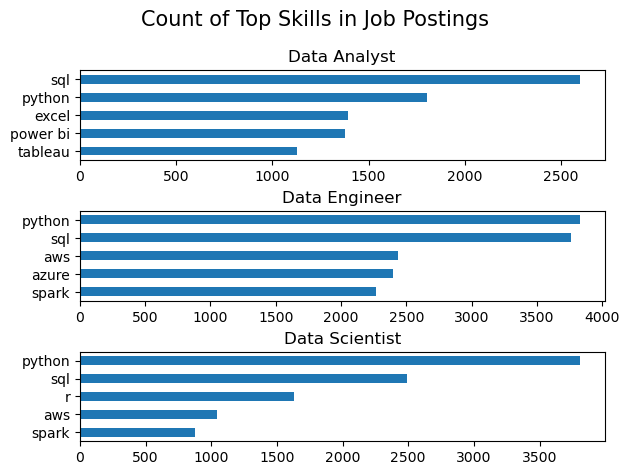

In [32]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [33]:
df_job_title_count = df_SPA['job_title_short'].value_counts().reset_index(name='jobs_total')

In [34]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skills_percent'] = df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] * 100

df_skills_perc



,job_skills,job_title_short,skill_count,jobs_total,skills_percent
0,python,Data Engineer,3827,6740,56.780415
1,python,Data Scientist,3804,5598,67.952840
2,sql,Data Engineer,3765,6740,55.860534
3,sql,Data Analyst,2595,5177,50.125555
4,sql,Data Scientist,2493,5598,44.533762
...,...,...,...,...,...
1530,neo4j,Machine Learning Engineer,1,600,0.166667
1531,ssrs,Senior Data Analyst,1,616,0.162338
1532,ssrs,Machine Learning Engineer,1,600,0.166667
1533,neo4j,Business Analyst,1,1505,0.066445


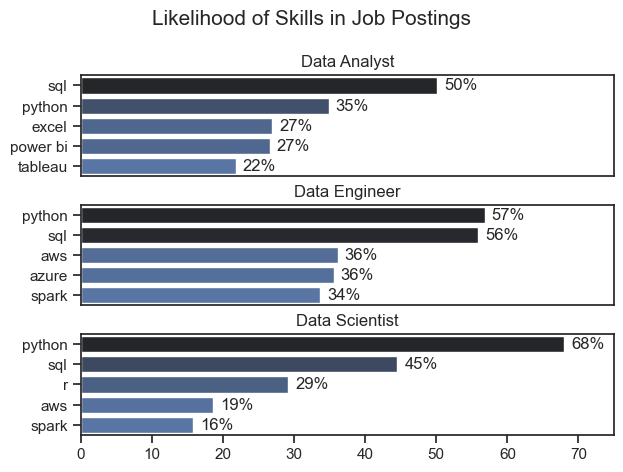

In [41]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind='barh', x='job_skills', y='skills_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skills_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    # ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 75)

    for n, v in enumerate(df_plot['skills_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()